In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import statsmodels.api as sm

c:\Users\Divya Bhardwaj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import scipy.stats as stats

In [6]:
kt = pd.read_excel("C:/Users/Divya Bhardwaj/Assignments/401_Assignments/Divya_21227707087_EC401_Assignment_1/kt.xlsx")

In [7]:
kt.index=kt.index+1

In [8]:
kt.head(10)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
1,2,15,2.60,12,14,1.50,12,12,0,1
2,4,13,2.12,11,14,0.26,12,10,1,4
3,6,15,2.70,14,14,0.44,12,16,0,2
4,7,15,2.35,9,14,0.91,12,12,0,1
5,8,13,2.01,18,14,0.51,12,15,1,2
6,10,11,2.60,16,14,0.26,12,12,0,2
7,12,13,2.91,16,14,-1.30,13,12,0,5
8,13,12,3.88,17,14,-0.63,12,12,1,4
9,15,13,3.22,12,14,0.28,10,12,1,3
10,16,12,2.56,12,14,-0.72,14,12,0,1


In [9]:
kt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  1499 non-null   int64  
 1   EDUC      1499 non-null   int64  
 2   LOGWAGE   1499 non-null   float64
 3   POTEXPER  1499 non-null   int64  
 4   TIMETRND  1499 non-null   int64  
 5   ABILITY   1499 non-null   float64
 6   MOTHERED  1499 non-null   int64  
 7   FATHERED  1499 non-null   int64  
 8   BRKNHOME  1499 non-null   int64  
 9   SIBLINGS  1499 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 117.2 KB


In [10]:
kt['CONSTANT']= 1

In [11]:
kt.loc[:, kt.columns != 'PERSONID'].describe()

,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS,CONSTANT
count,1499.000000,1499.000000,1499.000000,1499.0,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.0
mean,13.110740,2.495484,13.392929,14.0,0.120734,11.609740,11.919947,0.152101,3.063376,1.0
std,2.192598,0.546943,3.028962,0.0,0.932445,3.026882,3.819037,0.359239,2.036873,0.0
min,9.000000,0.210000,4.000000,14.0,-3.960000,0.000000,0.000000,0.000000,0.000000,1.0
25%,12.000000,2.180000,11.000000,14.0,-0.460000,11.000000,10.000000,0.000000,2.000000,1.0
50%,12.000000,2.500000,13.000000,14.0,0.280000,12.000000,12.000000,0.000000,3.000000,1.0
75%,15.000000,2.840000,16.000000,14.0,0.840000,12.000000,14.000000,0.000000,4.000000,1.0
max,20.000000,4.320000,22.000000,14.0,2.010000,20.000000,20.000000,1.000000,15.000000,1.0


In [12]:
X1=kt[["CONSTANT","EDUC","POTEXPER","ABILITY"]]

In [13]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONSTANT  1499 non-null   int64  
 1   EDUC      1499 non-null   int64  
 2   POTEXPER  1499 non-null   int64  
 3   ABILITY   1499 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 47.0 KB


In [14]:
X2=kt[["MOTHERED","FATHERED","SIBLINGS"]]

In [15]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOTHERED  1499 non-null   int64
 1   FATHERED  1499 non-null   int64
 2   SIBLINGS  1499 non-null   int64
dtypes: int64(3)
memory usage: 35.3 KB


In [16]:
Y=pd.DataFrame()

In [17]:
Y["LOGWAGE"]=kt.LOGWAGE

In [18]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOGWAGE  1499 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB


In [19]:
X=pd.DataFrame()

In [20]:
X=pd.DataFrame.join(X1,X2)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 1 to 1499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONSTANT  1499 non-null   int64  
 1   EDUC      1499 non-null   int64  
 2   POTEXPER  1499 non-null   int64  
 3   ABILITY   1499 non-null   float64
 4   MOTHERED  1499 non-null   int64  
 5   FATHERED  1499 non-null   int64  
 6   SIBLINGS  1499 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 82.1 KB


Text(0.5, 1.0, 'SCATTER PLOT B/W CONSTANT AND LOGWAGE')

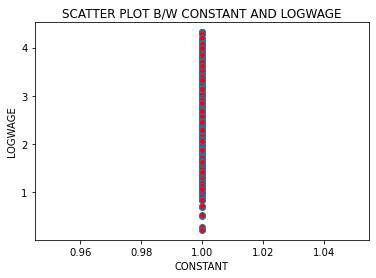

In [22]:
plt.plot( X1["CONSTANT"], Y["LOGWAGE"],linestyle="None",marker="o", markerfacecolor="red")
plt.xlabel("CONSTANT")
plt.ylabel("LOGWAGE")
plt.title("SCATTER PLOT B/W CONSTANT AND LOGWAGE")
## Scatter Plot Y and Educ

Text(0.5, 1.0, 'SCATTER PLOT B/W EDUC AND LOGWAGE')

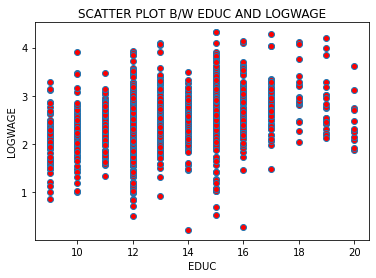

In [23]:
plt.plot( X1["EDUC"], Y["LOGWAGE"], linestyle="None",marker="o", markerfacecolor="red")
plt.xlabel("EDUC")
plt.ylabel("LOGWAGE")
plt.title("SCATTER PLOT B/W EDUC AND LOGWAGE")
## Scatter Plot Y and Potexper

Text(0.5, 1.0, 'SCATTER PLOT B/W POTEXPER AND LOGWAGE')

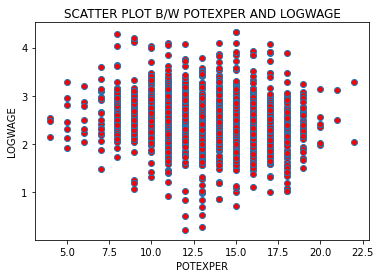

In [24]:
plt.plot( X1["POTEXPER"],Y["LOGWAGE"], linestyle="None",marker="o", markerfacecolor="red")
plt.xlabel("POTEXPER")
plt.ylabel("LOGWAGE")
plt.title("SCATTER PLOT B/W POTEXPER AND LOGWAGE")
## Scatter Plot Y and Ability

Text(0.5, 1.0, 'SCATTER PLOT B/W ABILITY AND LOGWAGE')

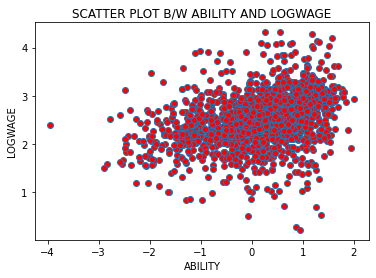

In [25]:
plt.plot( X1["ABILITY"],Y["LOGWAGE"], linestyle="None",marker="o", markerfacecolor="red")
plt.xlabel("ABILITY")
plt.ylabel("LOGWAGE")
plt.title("SCATTER PLOT B/W ABILITY AND LOGWAGE")
#

In [26]:
kt_corr=X.apply(Y["LOGWAGE"].corr)

In [27]:
kt_corr

CONSTANT         NaN
EDUC        0.319125
POTEXPER   -0.133602
ABILITY     0.311470
MOTHERED    0.211839
FATHERED    0.228093
SIBLINGS   -0.085604
dtype: float64

In [28]:
beta_hat=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),(np.matmul(np.transpose(X),Y)))

<ipython-input-28-ef9b9681c326>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  beta_hat=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),(np.matmul(np.transpose(X),Y)))


In [29]:
beta_hat

,0
0,0.963104
1,0.073498
2,0.029154
3,0.100931
4,0.005060
5,0.008557
6,0.001752


In [30]:
lm_formula = sm.OLS.from_formula( 'LOGWAGE ~ CONSTANT + EDUC + POTEXPER + ABILITY + MOTHERED + FATHERED + SIBLINGS -1', kt).fit()

In [31]:
lm_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGWAGE   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.01e-47
Time:                        17:37:16   Log-Likelihood:                -1104.5
No. Observations:                1499   AIC:                             2223.
Df Residuals:                    1492   BIC:                             2260.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       0.9631      0.182      5.305      0.000       0.607       1.319
EDUC           0.0735      0.009      8.092      0.000       0.056       0.091
POTEXPER       0.0292      0.006      4.952      0.000       0.018       0.041
ABILITY        0.1009      0.018      5.536      0.000       0.065       0.137
MOTHERED       0.0051      0.006      0.821      0.412      -0.007       0.017
FATHERED       0.0086      0.005      1.767      0.077      -0.001       0.018
SIBLINGS       0.0018      0.007      0.253      0.801      -0.012       0.015
==============================================================================
Omnibus:                       97.109   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.656
Skew:                          -0.357   Prob(JB):                     2.75e-54
Kurtosis:                       4.855   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lm_builtin=sm.OLS(Y,X).fit()

In [33]:
lm_builtin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGWAGE   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.01e-47
Time:                        17:37:21   Log-Likelihood:                -1104.5
No. Observations:                1499   AIC:                             2223.
Df Residuals:                    1492   BIC:                             2260.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       0.9631      0.182      5.305      0.000       0.607       1.319
EDUC           0.0735      0.009      8.092      0.000       0.056       0.091
POTEXPER       0.0292      0.006      4.952      0.000       0.018       0.041
ABILITY        0.1009      0.018      5.536      0.000       0.065       0.137
MOTHERED       0.0051      0.006      0.821      0.412      -0.007       0.017
FATHERED       0.0086      0.005      1.767      0.077      -0.001       0.018
SIBLINGS       0.0018      0.007      0.253      0.801      -0.012       0.015
==============================================================================
Omnibus:                       97.109   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.656
Skew:                          -0.357   Prob(JB):                     2.75e-54
Kurtosis:                       4.855   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm_mothered=sm.OLS(X2.MOTHERED,X1).fit()

In [35]:
lm_mothered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOTHERED   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           6.02e-83
Time:                        17:37:25   Log-Likelihood:                -3594.2
No. Observations:                1499   AIC:                             7196.
Df Residuals:                    1495   BIC:                             7218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       8.5475      0.919      9.302      0.000       6.745      10.350
EDUC           0.2397      0.047      5.093      0.000       0.147       0.332
POTEXPER      -0.0161      0.031     -0.524      0.600      -0.076       0.044
ABILITY        1.1190      0.090     12.376      0.000       0.942       1.296
==============================================================================
Omnibus:                      295.740   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              770.336
Skew:                          -1.042   Prob(JB):                    5.29e-168
Kurtosis:                       5.826   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm_fathered=sm.OLS(X2.FATHERED,X1).fit()

In [37]:
lm_fathered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FATHERED   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           7.13e-89
Time:                        17:37:28   Log-Likelihood:                -3928.9
No. Observations:                1499   AIC:                             7866.
Df Residuals:                    1495   BIC:                             7887.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       7.2298      1.149      6.293      0.000       4.976       9.483
EDUC           0.3742      0.059      6.359      0.000       0.259       0.490
POTEXPER      -0.0279      0.038     -0.726      0.468      -0.103       0.047
ABILITY        1.3109      0.113     11.597      0.000       1.089       1.533
==============================================================================
Omnibus:                      122.046   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.377
Skew:                          -0.620   Prob(JB):                     3.38e-41
Kurtosis:                       4.202   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lm_siblings=sm.OLS(X2.SIBLINGS,X1).fit()

In [39]:
lm_siblings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SIBLINGS   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     41.34
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.15e-25
Time:                        17:37:30   Log-Likelihood:                -3133.2
No. Observations:                1499   AIC:                             6274.
Df Residuals:                    1495   BIC:                             6296.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       1.9729      0.676      2.920      0.004       0.648       3.298
EDUC          -0.0161      0.035     -0.464      0.643      -0.084       0.052
POTEXPER       0.1004      0.023      4.438      0.000       0.056       0.145
ABILITY       -0.3570      0.066     -5.371      0.000      -0.487      -0.227
==============================================================================
Omnibus:                      296.901   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.544
Skew:                           1.118   Prob(JB):                    6.64e-141
Kurtosis:                       5.311   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm_mothered.resid

1      -1.628416
2       0.222423
3      -0.410097
4      -1.016559
5       0.055453
          ...   
1495    5.042345
1496   -5.621967
1497   -6.192758
1498    2.313780
1499   -2.923455
Length: 1499, dtype: float64

In [41]:
lm_fathered.resid

1      -2.473860
2      -2.127905
3       2.971536
4      -1.784231
5       2.739887
          ...   
1495    0.576299
1496   -5.030436
1497   -4.680486
1498   -0.755472
1499   -4.699498
Length: 1499, dtype: float64

In [42]:
lm_siblings.resid

1       -1.400818
2        1.224718
3       -0.979983
4       -1.310390
5       -1.388532
          ...    
1495    -0.718956
1496     0.173936
1497    10.011103
1498    -0.217587
1499     0.622619
Length: 1499, dtype: float64

In [43]:
X2_asterisk=pd.DataFrame()

In [44]:
X2_asterisk["mothered_resid"]=lm_mothered.resid

In [45]:
X2_asterisk["fathered_resid"]=lm_fathered.resid

In [46]:
X2_asterisk["siblings_resid"]=lm_siblings.resid

In [47]:
X2_asterisk.describe()

,mothered_resid,fathered_resid,siblings_resid
count,1.499000e+03,1.499000e+03,1.499000e+03
mean,-1.357212e-14,-1.521457e-14,-3.762464e-15
std,2.662055e+00,3.328148e+00,1.957301e+00
min,-1.295448e+01,-1.412118e+01,-4.071056e+00
25%,-1.072323e+00,-1.748878e+00,-1.314880e+00
50%,2.580314e-01,2.548543e-01,-3.512178e-01
75%,1.537228e+00,2.018712e+00,9.422830e-01
max,7.520909e+00,9.118324e+00,1.132803e+01


In [48]:
stats.ttest_1samp(a=X2_asterisk.mothered_resid, popmean=0)

Ttest_1sampResult(statistic=-2.0130528615766356e-13, pvalue=0.9999999999998395)

In [49]:
stats.ttest_1samp(a=X2_asterisk.fathered_resid, popmean=0)

Ttest_1sampResult(statistic=-1.685156193819453e-13, pvalue=0.9999999999998656)

In [50]:
stats.ttest_1samp(a=X2_asterisk.siblings_resid, popmean=0)

Ttest_1sampResult(statistic=-7.351023470063113e-14, pvalue=0.9999999999999414)

In [51]:
lm_y_on_x1=sm.OLS(Y,X1).fit()

In [52]:
lm_y_on_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGWAGE   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     81.39
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           8.93e-49
Time:                        17:38:10   Log-Likelihood:                -1108.6
No. Observations:                1499   AIC:                             2225.
Df Residuals:                    1495   BIC:                             2246.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       1.0717      0.175      6.123      0.000       0.728       1.415
EDUC           0.0779      0.009      8.686      0.000       0.060       0.095
POTEXPER       0.0290      0.006      4.952      0.000       0.018       0.041
ABILITY        0.1172      0.017      6.804      0.000       0.083       0.151
==============================================================================
Omnibus:                      100.501   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.425
Skew:                          -0.364   Prob(JB):                     2.81e-57
Kurtosis:                       4.908   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lm_y_on_x1_and_x2=sm.OLS.from_formula('Y~X1+X2-1',kt).fit()

In [54]:
lm_y_on_x1_and_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.01e-47
Time:                        17:38:14   Log-Likelihood:                -1104.5
No. Observations:                1499   AIC:                             2223.
Df Residuals:                    1492   BIC:                             2260.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1[0]          0.9631      0.182      5.305      0.000       0.607       1.319
X1[1]          0.0735      0.009      8.092      0.000       0.056       0.091
X1[2]          0.0292      0.006      4.952      0.000       0.018       0.041
X1[3]          0.1009      0.018      5.536      0.000       0.065       0.137
X2[0]          0.0051      0.006      0.821      0.412      -0.007       0.017
X2[1]          0.0086      0.005      1.767      0.077      -0.001       0.018
X2[2]          0.0018      0.007      0.253      0.801      -0.012       0.015
==============================================================================
Omnibus:                       97.109   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.656
Skew:                          -0.357   Prob(JB):                     2.75e-54
Kurtosis:                       4.855   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm_y_on_x=sm.OLS(Y,X).fit()

In [56]:
lm_y_on_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGWAGE   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.01e-47
Time:                        17:38:17   Log-Likelihood:                -1104.5
No. Observations:                1499   AIC:                             2223.
Df Residuals:                    1492   BIC:                             2260.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT       0.9631      0.182      5.305      0.000       0.607       1.319
EDUC           0.0735      0.009      8.092      0.000       0.056       0.091
POTEXPER       0.0292      0.006      4.952      0.000       0.018       0.041
ABILITY        0.1009      0.018      5.536      0.000       0.065       0.137
MOTHERED       0.0051      0.006      0.821      0.412      -0.007       0.017
FATHERED       0.0086      0.005      1.767      0.077      -0.001       0.018
SIBLINGS       0.0018      0.007      0.253      0.801      -0.012       0.015
==============================================================================
Omnibus:                       97.109   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.656
Skew:                          -0.357   Prob(JB):                     2.75e-54
Kurtosis:                       4.855   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
lm_y_on_x1_and_x2_asterisk=sm.OLS.from_formula('LOGWAGE ~  CONSTANT + EDUC + POTEXPER + ABILITY + X2_asterisk.mothered_resid + X2_asterisk.fathered_resid +X2_asterisk.siblings_resid - 1',kt).fit()

In [58]:
lm_y_on_x1_and_x2_asterisk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGWAGE   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.01e-47
Time:                        17:38:22   Log-Likelihood:                -1104.5
No. Observations:                1499   AIC:                             2223.
Df Residuals:                    1492   BIC:                             2260.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
CONSTANT                       1.0717      0.175      6.133      0.000       0.729       1.414
EDUC                           0.0779      0.009      8.701      0.000       0.060       0.095
POTEXPER                       0.0290      0.006      4.960      0.000       0.018       0.040
ABILITY                        0.1172      0.017      6.816      0.000       0.083       0.151
X2_asterisk.mothered_resid     0.0051      0.006      0.821      0.412      -0.007       0.017
X2_asterisk.fathered_resid     0.0086      0.005      1.767      0.077      -0.001       0.018
X2_asterisk.siblings_resid     0.0018      0.007      0.253      0.801      -0.012       0.015
==============================================================================
Omnibus:                       97.109   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.656
Skew:                          -0.357   Prob(JB):                     2.75e-54
Kurtosis:                       4.855   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""